<a href="https://colab.research.google.com/github/mustaphamerakech/tpMachineLearning/blob/main/predictThePriceOfUsedCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  drive_file_path = '/content/drive/MyDrive/tpMachineLearning/archive1.zip'
  import zipfile
  import os

  # Spécifiez le chemin d'extraction
  extract_path = '/content/data/'

  # Assurez-vous que le répertoire d'extraction existe
  os.makedirs(extract_path, exist_ok=True)

  # Décompressez le fichier
  with zipfile.ZipFile(drive_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_path)

  # Liste des fichiers dans le répertoire d'extraction
  os.listdir(extract_path)


['unclean focus.csv',
 'skoda.csv',
 'unclean cclass.csv',
 'vauxhall.csv',
 'cclass.csv',
 'merc.csv',
 'ford.csv',
 'focus.csv',
 'audi.csv',
 'vw.csv',
 'toyota.csv',
 'hyundi.csv',
 'bmw.csv']

In [ ]:
import os
import pandas as pd

# Spécifiez le chemin d'extraction
extract_path = '/content/data/'

# Liste des fichiers dans le répertoire d'extraction
files = os.listdir(extract_path)

# Afficher les informations pour chaque fichier CSV
for file in files:
    file_path = os.path.join(extract_path, file)
    df = pd.read_csv(file_path)

    # Afficher les premières lignes du DataFrame
    #print(f"\nInformations pour le fichier : {file}")
    #print(df.head())

    # Afficher les informations sur les colonnes
    print("\nInformations sur les colonnes :")
    print(df.info())

    # Afficher des statistiques descriptives
    print("\nStatistiques descriptives :")
    print(df.describe())



Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5548 non-null   object 
 1   year          5459 non-null   float64
 2   price         5548 non-null   object 
 3   transmission  5548 non-null   object 
 4   mileage       4729 non-null   object 
 5   fuel type     2188 non-null   object 
 6   engine size   5503 non-null   object 
 7   mileage2      5509 non-null   object 
 8   fuel type2    4729 non-null   object 
 9   engine size2  4729 non-null   object 
 10  reference     5548 non-null   object 
dtypes: float64(1), object(10)
memory usage: 481.7+ KB
None

Statistiques descriptives :
              year
count  5459.000000
mean   2017.106063
std       2.184575
min    2002.000000
25%    2016.000000
50%    2017.000000
75%    2019.000000
max    2020.000000

Informations sur les colonnes :
<class '

In [ ]:
import os
import pandas as pd

# Spécifiez le chemin d'extraction
extract_path = '/content/data/'

# Liste des fichiers dans le répertoire d'extraction
files = os.listdir(extract_path)

# Initialiser un DataFrame vide
df_concatenated = pd.DataFrame()

# Concaténer les fichiers
for file in files:
    file_path = os.path.join(extract_path, file)
    df = pd.read_csv(file_path)

    # Renommer les colonnes pour les uniformiser
    df.rename(columns={'fuel type': 'fuelType', 'engine size': 'engineSize','tax(£)':'tax'}, inplace=True)

    # Traitement des valeurs manquantes et 'Unknown' dans 'mileage'
    df['mileage'] = df['mileage'].replace('Unknown', None)

    # Vérifier si la colonne 'mileage' est de type string avant la conversion
    if df['mileage'].dtype == 'O':
        df['mileage'] = pd.to_numeric(df['mileage'].str.replace(',', ''), errors='coerce')

    df['mileage'].fillna(df['mileage'].mean(), inplace=True)

    # Vérifier si la colonne 'price' est de type string avant la conversion
    if df['price'].dtype == 'O':
        df['price'] = df['price'].str.replace('£', '').replace(',', '', regex=True).astype(float)

    # Ajouter le DataFrame au DataFrame concaténé
    df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)

# Enregistrer le DataFrame concaténé dans un fichier CSV
df_concatenated.to_csv('/content/data/vehicles_nettoyer.csv', index=False)

# Afficher le DataFrame concaténé
missing_values_per_column = df_concatenated.isnull().sum()
print("Nombre de cases vides par colonne :")
print(missing_values_per_column)
df_concatenated.info()
df_concatenated.shape
df_concatenated.head()


Nombre de cases vides par colonne :
model              155
year               247
price              155
transmission       155
mileage              0
fuelType          6093
engineSize         265
mileage2        108751
fuel type2      109613
engine size2    109613
reference       108695
tax              18963
mpg              18963
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118150 entries, 0 to 118149
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         117995 non-null  object 
 1   year          117903 non-null  float64
 2   price         117995 non-null  float64
 3   transmission  117995 non-null  object 
 4   mileage       118150 non-null  float64
 5   fuelType      112057 non-null  object 
 6   engineSize    117885 non-null  object 
 7   mileage2      9399 non-null    object 
 8   fuel type2    8537 non-null    object 
 9   engine size2  8537 non-null    object 
 10  referenc

,model,year,price,transmission,mileage,fuelType,engineSize,mileage2,fuel type2,engine size2,reference,tax,mpg
0,Focus,2016.0,8000.0,Manual,24017.563029,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236,NaN,NaN
1,Focus,2019.0,13400.0,Manual,24017.563029,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927,NaN,NaN
2,Focus,2019.0,14600.0,Manual,24017.563029,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363,NaN,NaN
3,Focus,2016.0,9450.0,Manual,24017.563029,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868,NaN,NaN
4,Focus,2015.0,9999.0,Manual,24017.563029,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057,NaN,NaN


In [ ]:
import pandas as pd

# Charger le DataFrame
df = pd.read_csv('/content/data/vehicles_nettoyer.csv', low_memory=False)

# Traiter les valeurs manquantes pour chaque colonne
df['model'].fillna('Unknown', inplace=True)
df['year'].fillna(df['year'].median(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['transmission'].fillna('Unknown', inplace=True)
df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['fuelType'].fillna('Unknown', inplace=True)
# Remplacer les valeurs manquantes dans 'tax' par la médiane
df['tax'].fillna(df['tax'].median(), inplace=True)
# Remplacer les valeurs manquantes dans 'mpg' par la moyenne
df['mpg'].fillna(df['mpg'].mean(), inplace=True)
# Remplacer les valeurs manquantes dans 'tax(£)' par une valeur par défaut (par exemple, 0)


# Convertir 'engineSize' en numérique en traitant les valeurs non numériques comme NaN
df['engineSize'] = pd.to_numeric(df['engineSize'], errors='coerce')

# Traiter les valeurs manquantes dans 'engineSize'
df['engineSize'].fillna(df['engineSize'].mean(), inplace=True)

# Supprimer les lignes dupliquées
df.drop_duplicates(inplace=True)

# Supprimer les colonnes inutiles
colonnes_a_supprimer = ['mileage2', 'fuel type2', 'engine size2', 'reference']
df.drop(colonnes_a_supprimer, axis=1, inplace=True)

# Vérifier si toutes les valeurs manquantes ont été traitées et s'il reste des lignes dupliquées
print("Nombre de valeurs manquantes après le nettoyage :")
print(df.isnull().sum())
df.info()
# Enregistrer le DataFrame nettoyé dans un nouveau fichier CSV si nécessaire
df.to_csv('/content/data/vehicles_traite.csv', index=False)


Nombre de valeurs manquantes après le nettoyage :
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
tax             0
mpg             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115724 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115724 non-null  object 
 1   year          115724 non-null  float64
 2   price         115724 non-null  float64
 3   transmission  115724 non-null  object 
 4   mileage       115724 non-null  float64
 5   fuelType      115724 non-null  object 
 6   engineSize    115724 non-null  float64
 7   tax           115724 non-null  float64
 8   mpg           115724 non-null  float64
dtypes: float64(6), object(3)
memory usage: 8.8+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Charger le DataFrame à partir du fichier d'origine
df = pd.read_csv('/content/data/vehicles_traite.csv')

# Exemple de standardisation des colonnes numériques
numeric_columns = ['year','price','mileage','engineSize','tax','mpg']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Exemple d'encodage one-hot pour les colonnes catégoriques
categorical_columns = ['model','transmission','fuelType']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Sauvegarder le DataFrame modifié dans le fichier d'origine
df_encoded.to_csv('/content/data/autos_encoded.csv', index=False)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115724 entries, 0 to 115723
Columns: 253 entries, year to fuelType_Unknown
dtypes: float64(6), uint8(247)
memory usage: 32.6 MB


In [ ]:
df_encoded.head()

,year,price,mileage,engineSize,tax,mpg,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,fuelType_6,fuelType_7,fuelType_8,fuelType_9,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fuelType_Unknown
0,-0.506806,-0.923187,0.037767,-0.036167,0.356275,-0.002203,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.896978,-0.365341,0.037767,-0.036167,0.356275,-0.002203,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.896978,-0.241375,0.037767,-0.025863,0.356275,-0.002203,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.506806,-0.773395,0.037767,-0.024582,0.356275,-0.002203,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.974735,-0.716681,0.037767,-0.024582,0.356275,-0.002203,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = df_encoded.drop('price', axis=1)
X

,year,mileage,engineSize,tax,mpg,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_6,fuelType_7,fuelType_8,fuelType_9,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fuelType_Unknown
0,-0.506806,0.037767,-0.036167,0.356275,-0.002203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.896978,0.037767,-0.036167,0.356275,-0.002203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.896978,0.037767,-0.025863,0.356275,-0.002203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.506806,0.037767,-0.024582,0.356275,-0.002203,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.974735,0.037767,-0.024582,0.356275,-0.002203,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115719,-0.506806,0.834149,-0.015497,0.441149,-0.060500,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
115720,-0.506806,0.935068,-0.015497,0.016781,0.329572,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
115721,-0.038878,0.106522,-0.015497,1.289885,-0.833919,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
115722,-1.442663,1.032386,-0.015497,-1.595816,0.605312,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
Y = df_encoded.price
Y

0        -0.923187
1        -0.365341
2        -0.241375
3        -0.773395
4        -0.716681
            ...   
115719    0.213166
115720   -0.241375
115721   -0.396333
115722   -0.723809
115723   -0.098711
Name: price, Length: 115724, dtype: float64

In [ ]:
X.shape

(115724, 252)

In [ ]:
Y.shape

(115724,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_test.shape, Y_test.shape

((23145, 10), (23145,))

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8913958911366574

In [ ]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

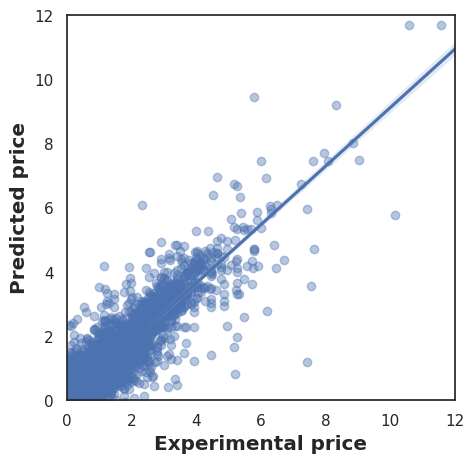

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted price', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show